# Terminology
This notebook serves showing images of different kind to explain common terminology.

In [1]:
from skimage.io import imread, imshow
import napari_segment_blobs_and_things_with_membranes as nsbatwm
import stackview
import numpy as np

## Intensity images
We start with intensity images as they are commonly produced by microscopes.

C:\Users\haase\mambaforge\envs\bio39\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


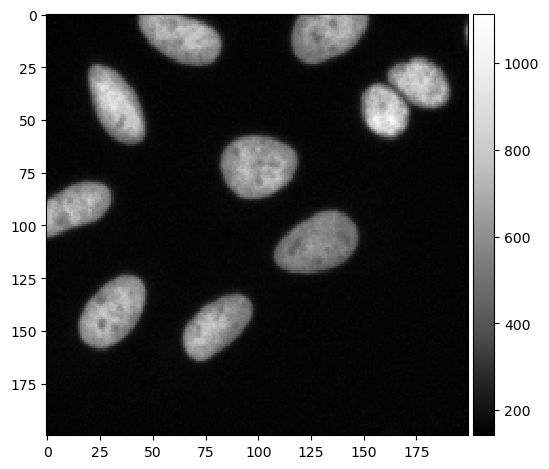

In [2]:
input_image = imread("data/BBBC022/IXMtest_A02_s9.tif")[:,:,0]

cropped_image = input_image[0:200, 200:400]

imshow(cropped_image, cmap='Greys_r')

## Binary images
Basic segmentation algorithms lead to binary images. They are characterized by having only two different intensities such as `0` and `1`.

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
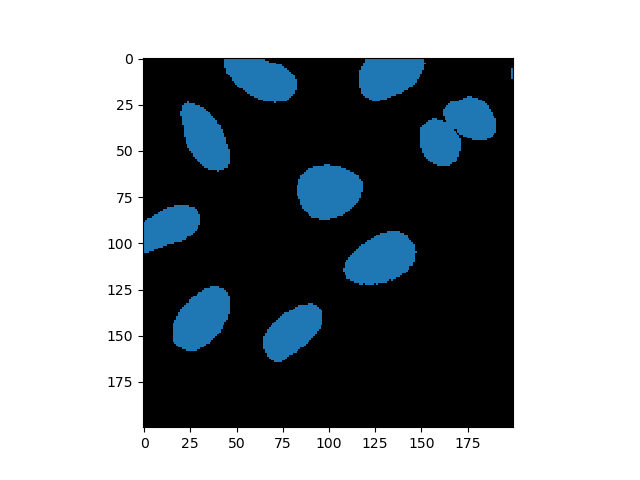

In [3]:
binary_image = nsbatwm.threshold_otsu(cropped_image)
binary_image

## Instance segmentation
If each individual object has its own intensity / color, we call it an instance segmentation label image. The inistances are labeled with integer numbers. The maximum intensity (label) in this image typically corresponds to the number of objects.

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
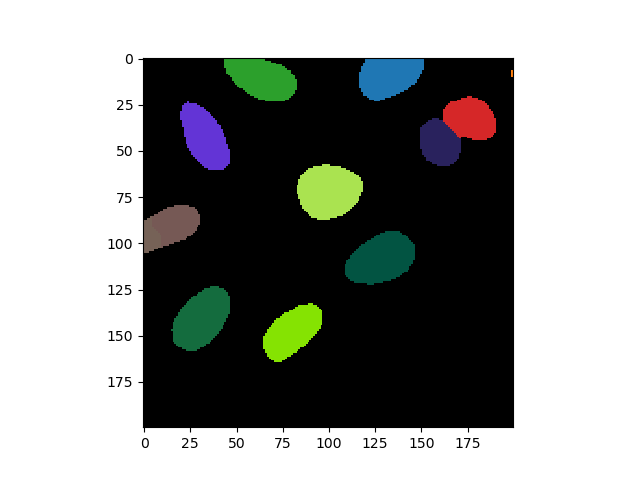

In [4]:
instance_segmentation = nsbatwm.voronoi_otsu_labeling(cropped_image, 
                                        spot_sigma=5, 
                                        outline_sigma=1)

instance_segmentation

When you run this notebook locally, you can hover with your mouse over the image and inspect pixel intensities.

In [5]:
import stackview
stackview.picker(instance_segmentation)

## Semantic segmentation
Semantic segmentation label images can have more than two labels and typically label regions where pixels have the same meanings, for example: nuclei, nuclear envelope and background.

StackViewNDArray([[1, 1, 1, ..., 1, 1, 1],
                  [1, 1, 1, ..., 1, 1, 1],
                  [1, 1, 1, ..., 1, 1, 1],
                  ...,
                  [1, 1, 1, ..., 1, 1, 1],
                  [1, 1, 1, ..., 1, 1, 1],
                  [1, 1, 1, ..., 1, 1, 1]], dtype=int64)
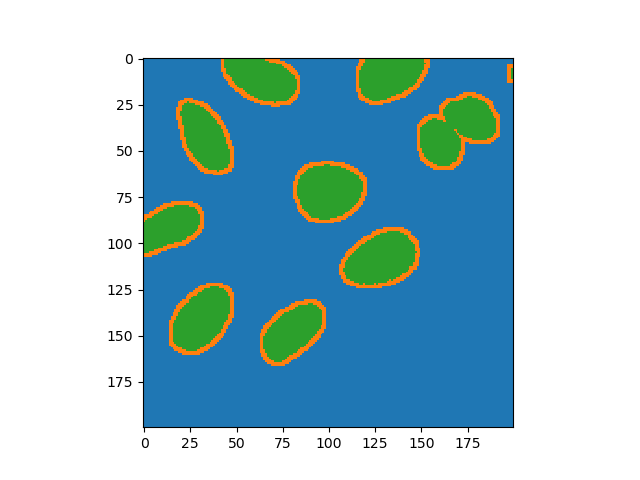

In [6]:
semantic_segmentation = binary_image + nsbatwm.maximum_filter(binary_image).astype(np.uint32) + 1
semantic_segmentation

## Sparse annotations
Annotated label images are typically drawn by humans. When executing this notebook locally, you can draw some annotations. If you annotate a couple of nuclei precisely, you create a sparse nuclei annotation. Hold down the ALT key to erase an annotation.

In [7]:
sparse_label_annotation = np.zeros_like(cropped_image, dtype=np.uint32)
stackview.annotate(cropped_image, sparse_label_annotation)

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
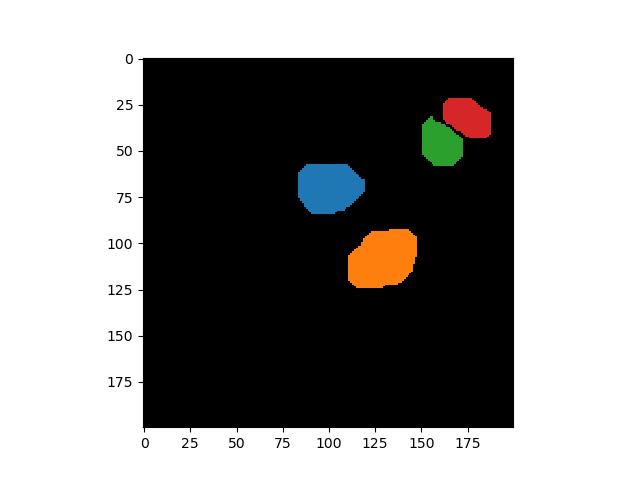

In [8]:
stackview.insight(sparse_label_annotation)

You can also create a sparse semantic annotation, e.g. by annotating some pixels within nuclei and some pixels within the background.

In [9]:
sparse_semantic_annotation = np.zeros_like(cropped_image, dtype=np.uint32)
stackview.annotate(cropped_image, sparse_semantic_annotation)

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
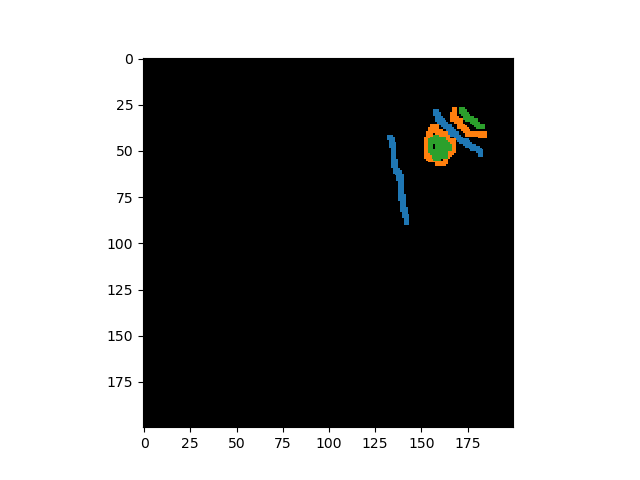

In [10]:
stackview.insight(sparse_semantic_annotation)